# From an autoencoder to denoising

An autoencoder, autoassociator or Diabolo network is an artificial neural network that aim is to learn a representation (or an *encoding*) for a set of data, often for the purpose of dimensionality reduction. Recently, the autoencoder concept has become more widely used for denoising images, and we shall illustrate these in this notebook on the MNIST dataset. 

First, let us look download the images from the MNIST dataset, and look at some of them.

Using TensorFlow backend.


(60000, 784)
(10000, 784)


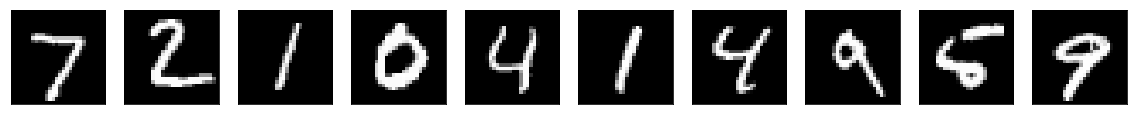

In [1]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

%matplotlib inline
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Let us define our autoencoder. 

**First** we encode data by a first neural network that goes from the $784$ points to $128$, then $64$ and finally $32$. 

**Second** we write the decoder that performs the same operation, in reverse.

**Third** we can build our model and compile it,

In [2]:
from keras.layers import Input, Dense
from keras.models import Model
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder_mlp = Model(input_img, decoded)
autoencoder_mlp.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder_mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_6 (Dense)              (None, 784)               101136    
Total para

We now run the training for $100$ epochs. This takes some time because there are a lot of paramteres to learn. On a K80 GPU it takes 1sec/epoch, but on a standard CPU it is about 6sec/epoch.

In [34]:
#Training the model -- CAN BE SKIPPED TO SAVE TIME
history_mlp = autoencoder_mlp.fit(x_train, x_train,
                epochs=500,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/500
60000/60000 [==============================] - 1s - loss: 0.3424 - val_loss: 0.2624
Epoch 2/500
60000/60000 [==============================] - 1s - loss: 0.2543 - val_loss: 0.2454
Epoch 3/500
60000/60000 [==============================] - 1s - loss: 0.2364 - val_loss: 0.2257
Epoch 4/500
60000/60000 [==============================] - 1s - loss: 0.2223 - val_loss: 0.2148
Epoch 5/500
60000/60000 [==============================] - 1s - loss: 0.2109 - val_loss: 0.2049
Epoch 6/500
60000/60000 [==============================] - 1s - loss: 0.2019 - val_loss: 0.1961
Epoch 7/500
60000/60000 [==============================] - 1s - loss: 0.1921 - val_loss: 0.1870
Epoch 8/500
60000/60000 [==============================] - 1s - loss: 0.1846 - val_loss: 0.1827
Epoch 9/500
60000/60000 [==============================] - 1s - loss: 0.1772 - val_loss: 0.1709
Epoch 10/500
60000/60000 [==============================] - 1s - loss: 0.1706 - val_lo

60000/60000 [==============================] - 1s - loss: 0.1069 - val_loss: 0.1060
Epoch 86/500
60000/60000 [==============================] - 1s - loss: 0.1067 - val_loss: 0.1057
Epoch 87/500
60000/60000 [==============================] - 1s - loss: 0.1065 - val_loss: 0.1057
Epoch 88/500
60000/60000 [==============================] - 1s - loss: 0.1062 - val_loss: 0.1050
Epoch 89/500
60000/60000 [==============================] - 1s - loss: 0.1061 - val_loss: 0.1048
Epoch 90/500
60000/60000 [==============================] - 1s - loss: 0.1058 - val_loss: 0.1047
Epoch 91/500
60000/60000 [==============================] - 1s - loss: 0.1056 - val_loss: 0.1044
Epoch 92/500
60000/60000 [==============================] - 1s - loss: 0.1054 - val_loss: 0.1038
Epoch 93/500
60000/60000 [==============================] - 1s - loss: 0.1054 - val_loss: 0.1038
Epoch 94/500
60000/60000 [==============================] - 1s - loss: 0.1050 - val_loss: 0.1036
Epoch 95/500
60000/60000 [=================

60000/60000 [==============================] - 1s - loss: 0.0904 - val_loss: 0.0891
Epoch 252/500
60000/60000 [==============================] - 1s - loss: 0.0902 - val_loss: 0.0893
Epoch 253/500
60000/60000 [==============================] - 1s - loss: 0.0903 - val_loss: 0.0898
Epoch 254/500
60000/60000 [==============================] - 1s - loss: 0.0902 - val_loss: 0.0898
Epoch 255/500
60000/60000 [==============================] - 1s - loss: 0.0902 - val_loss: 0.0896
Epoch 256/500
60000/60000 [==============================] - 1s - loss: 0.0901 - val_loss: 0.0897
Epoch 257/500
60000/60000 [==============================] - 1s - loss: 0.0901 - val_loss: 0.0899
Epoch 258/500
60000/60000 [==============================] - 1s - loss: 0.0901 - val_loss: 0.0895
Epoch 259/500
60000/60000 [==============================] - 1s - loss: 0.0900 - val_loss: 0.0901
Epoch 260/500
60000/60000 [==============================] - 1s - loss: 0.0900 - val_loss: 0.0901
Epoch 261/500
60000/60000 [=======

60000/60000 [==============================] - 1s - loss: 0.0868 - val_loss: 0.0871
Epoch 418/500
60000/60000 [==============================] - 1s - loss: 0.0868 - val_loss: 0.0866
Epoch 419/500
60000/60000 [==============================] - 1s - loss: 0.0869 - val_loss: 0.0869
Epoch 420/500
60000/60000 [==============================] - 1s - loss: 0.0868 - val_loss: 0.0865
Epoch 421/500
60000/60000 [==============================] - 1s - loss: 0.0868 - val_loss: 0.0861
Epoch 422/500
60000/60000 [==============================] - 1s - loss: 0.0868 - val_loss: 0.0866
Epoch 423/500
60000/60000 [==============================] - 1s - loss: 0.0868 - val_loss: 0.0860
Epoch 424/500
60000/60000 [==============================] - 1s - loss: 0.0868 - val_loss: 0.0874
Epoch 425/500
60000/60000 [==============================] - 1s - loss: 0.0868 - val_loss: 0.0867
Epoch 426/500
60000/60000 [==============================] - 1s - loss: 0.0867 - val_loss: 0.0865
Epoch 427/500
60000/60000 [=======

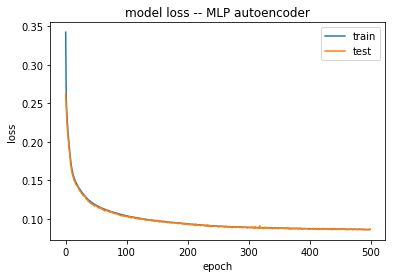

In [35]:
# Plot history for accuracy
plt.plot(history_mlp.history['loss'])
plt.plot(history_mlp.history['val_loss'])
plt.title('model loss -- MLP autoencoder')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [3]:
# READ THE WEIGHTS FROM FILE
#autoencoder_mlp.save_weights("mldata/dense_autoencoder.h5")
autoencoder_mlp.load_weights("mldata/dense_autoencoder.h5")

Now, it is time to see the result of the learning process. 

Let us create an "encoder" model with the weights that we have learned, that outputs the result of the middle layer, and records the images corresponding to the test set observed after compression:

In [4]:
encoder = Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)
print(encoded_imgs.shape)

(10000, 32)


We now do the same, but for the full autoencoder:

In [5]:
decoded_imgs = autoencoder_mlp.predict(x_test)
print(decoded_imgs.shape)

(10000, 784)


Let us see how it looks:

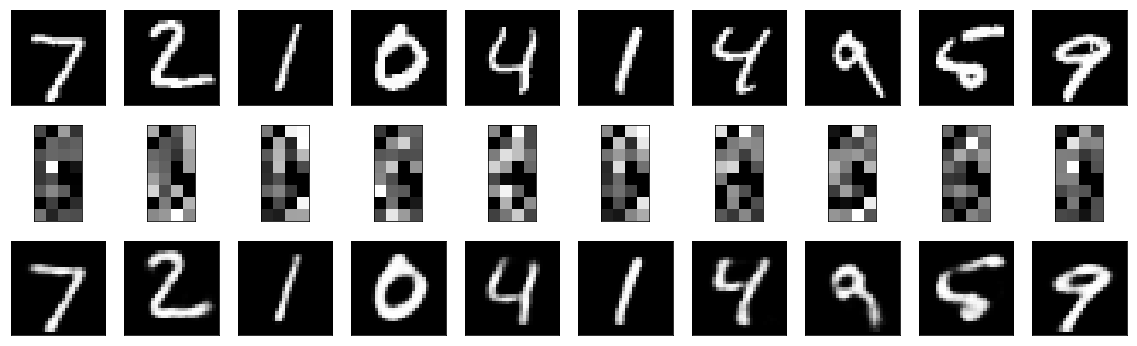

In [6]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(8,4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n + n )
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

This is quite nice, and indeed we see that we can regognize images quite easily. We can also have a look at the 32-dimensional encoded representations in the middle. Notice how the two "one" are coded similarly, as well as the two "four".

## Convolutional auto-encoder

Now we are going to build the autoencoer only with cnn:

In [7]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))  

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# After the encoding, the representation is (4, 4, 8) (128-dimensional)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder_cnn = Model(input_img, decoded)
autoencoder_cnn.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder_cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 8)           0         
__________

Since we are using cnn layers, images should be kept as two-dimensional arrays. Once this is done, we repeat the fitting operation. It takes about 5s by epoch on a K80 GPU.

In [8]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

In [15]:
#Training the model -- CAN BE SKIPPED TO SAVE TIME
history_cnn = autoencoder_cnn.fit(x_train, x_train,
                epochs=200,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 6s - loss: 0.2283 - val_loss: 0.1804
Epoch 2/200
60000/60000 [==============================] - 5s - loss: 0.1703 - val_loss: 0.1556
Epoch 3/200
60000/60000 [==============================] - 5s - loss: 0.1538 - val_loss: 0.1516
Epoch 4/200
60000/60000 [==============================] - 5s - loss: 0.1436 - val_loss: 0.1409
Epoch 5/200
60000/60000 [==============================] - 5s - loss: 0.1367 - val_loss: 0.1322
Epoch 6/200
60000/60000 [==============================] - 5s - loss: 0.1315 - val_loss: 0.1295
Epoch 7/200
60000/60000 [==============================] - 5s - loss: 0.1273 - val_loss: 0.1259
Epoch 8/200
60000/60000 [==============================] - 5s - loss: 0.1237 - val_loss: 0.1221
Epoch 9/200
60000/60000 [==============================] - 5s - loss: 0.1207 - val_loss: 0.1181
Epoch 10/200
60000/60000 [==============================] - 5s - loss: 0.1184 - val_lo

60000/60000 [==============================] - 5s - loss: 0.0936 - val_loss: 0.0926
Epoch 86/200
60000/60000 [==============================] - 5s - loss: 0.0933 - val_loss: 0.0918
Epoch 87/200
60000/60000 [==============================] - 5s - loss: 0.0933 - val_loss: 0.0908
Epoch 88/200
60000/60000 [==============================] - 5s - loss: 0.0933 - val_loss: 0.0913
Epoch 89/200
60000/60000 [==============================] - 5s - loss: 0.0931 - val_loss: 0.0930
Epoch 90/200
60000/60000 [==============================] - 5s - loss: 0.0932 - val_loss: 0.0927
Epoch 91/200
60000/60000 [==============================] - 5s - loss: 0.0931 - val_loss: 0.0916
Epoch 92/200
60000/60000 [==============================] - 5s - loss: 0.0930 - val_loss: 0.0933
Epoch 93/200
60000/60000 [==============================] - 5s - loss: 0.0929 - val_loss: 0.0910
Epoch 94/200
60000/60000 [==============================] - 5s - loss: 0.0928 - val_loss: 0.0913
Epoch 95/200
60000/60000 [=================

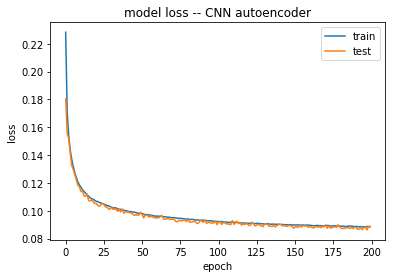

In [16]:
# Plot history for accuracy
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('model loss -- CNN autoencoder')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [9]:
# READ WEIGHTS FROM FILE
#autoencoder_cnn.save_weights("mldata/cnn_autoencoder.h5")
autoencoder_cnn.load_weights("mldata/cnn_autoencoder.h5")

Let us again look at the results:

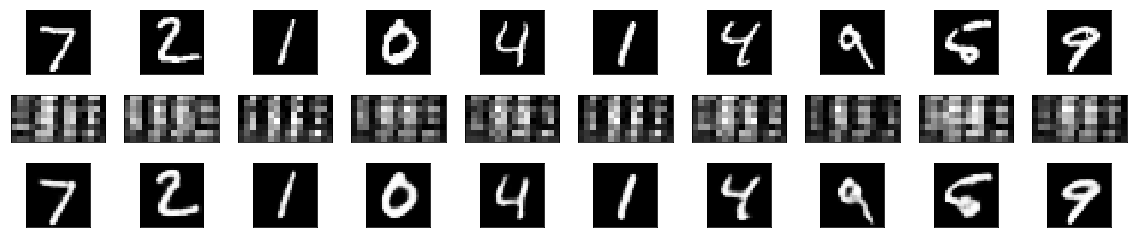

In [10]:
encoder = Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder_cnn.predict(x_test)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display original
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(16, 8).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Denoising with auto-encoders

## Noisy images

Now, we shall use our auto-encoders for denoising. We will train the autoencoder to map noisy images to clean ones. This will be done by applying a gaussian noise (and clip the images between 0 and 1) to the training set.

In [11]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

(60000, 784)
(10000, 784)


Let us see how these looks:

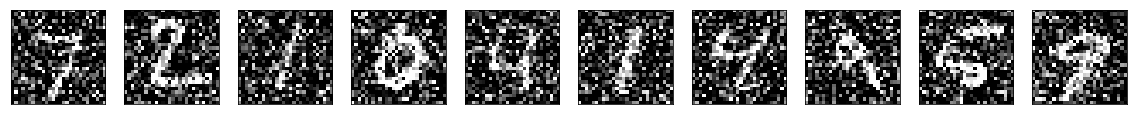

In [12]:
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Dense denoiser

Let's start by using the simple dense network we used above.

In [13]:
from keras.layers import Input, Dense
from keras.models import Model
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

denoiser_mlp = Model(input_img, decoded)
denoiser_mlp.compile(optimizer='adadelta', loss='binary_crossentropy')
denoiser_mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_10 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_11 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_12 (Dense)             (None, 784)               101136    
Total para

In [22]:
#Training the model -- CAN BE SKIPPED TO SAVE TIME
history_den_mlp = denoiser_mlp.fit(x_train_noisy, x_train,
                epochs=200,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 1s - loss: 0.3284 - val_loss: 0.2635
Epoch 2/200
60000/60000 [==============================] - 1s - loss: 0.2598 - val_loss: 0.2571
Epoch 3/200
60000/60000 [==============================] - 1s - loss: 0.2536 - val_loss: 0.2483
Epoch 4/200
60000/60000 [==============================] - 1s - loss: 0.2445 - val_loss: 0.2412
Epoch 5/200
60000/60000 [==============================] - 1s - loss: 0.2356 - val_loss: 0.2284
Epoch 6/200
60000/60000 [==============================] - 1s - loss: 0.2224 - val_loss: 0.2144
Epoch 7/200
60000/60000 [==============================] - 1s - loss: 0.2094 - val_loss: 0.2047
Epoch 8/200
60000/60000 [==============================] - 1s - loss: 0.2008 - val_loss: 0.1976
Epoch 9/200
60000/60000 [==============================] - 1s - loss: 0.1963 - val_loss: 0.1928
Epoch 10/200
60000/60000 [==============================] - 1s - loss: 0.1931 - val_lo

60000/60000 [==============================] - 1s - loss: 0.1269 - val_loss: 0.1277
Epoch 86/200
60000/60000 [==============================] - 1s - loss: 0.1266 - val_loss: 0.1286
Epoch 87/200
60000/60000 [==============================] - 1s - loss: 0.1264 - val_loss: 0.1261
Epoch 88/200
60000/60000 [==============================] - 1s - loss: 0.1262 - val_loss: 0.1268
Epoch 89/200
60000/60000 [==============================] - 1s - loss: 0.1260 - val_loss: 0.1266
Epoch 90/200
60000/60000 [==============================] - 1s - loss: 0.1260 - val_loss: 0.1258
Epoch 91/200
60000/60000 [==============================] - 1s - loss: 0.1256 - val_loss: 0.1276
Epoch 92/200
60000/60000 [==============================] - 1s - loss: 0.1254 - val_loss: 0.1258
Epoch 93/200
60000/60000 [==============================] - 1s - loss: 0.1252 - val_loss: 0.1270
Epoch 94/200
60000/60000 [==============================] - 1s - loss: 0.1252 - val_loss: 0.1259
Epoch 95/200
60000/60000 [=================

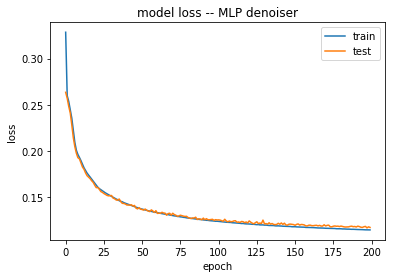

In [23]:
# Plot history for accuracy
plt.plot(history_den_mlp.history['loss'])
plt.plot(history_den_mlp.history['val_loss'])
plt.title('model loss -- MLP denoiser')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [14]:
# READ WEIGHTS FROM FILE
#denoiser_mlp.save_weights("mldata/dense_denoiser.h5")
denoiser_mlp.load_weights("mldata/dense_denoiser.h5")

Finally, we can look at the denoising performed on the noisy version of the test set. They are not so bad!

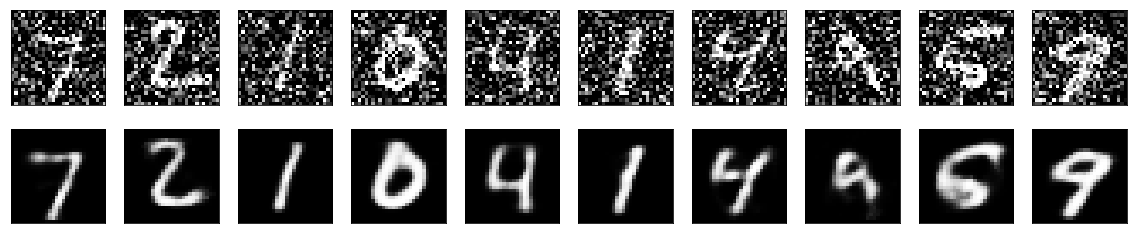

In [15]:
decoded_imgs = denoiser_mlp.predict(x_test_noisy)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## CNN denoiser

In order to improve the quality of the reconstruction, we shall use a CNN with more filters per layer...

In [16]:
# Reshape the images to use a CNN
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  
x_train_noisy = np.reshape(x_train_noisy, (len(x_train_noisy), 28, 28, 1))  
x_test_noisy = np.reshape(x_test_noisy, (len(x_test_noisy), 28, 28, 1))  

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Here this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

denoiser_cnn = Model(input_img, decoded)
denoiser_cnn.compile(optimizer='adadelta', loss='binary_crossentropy')
denoiser_cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d_4 (UpSampling2 (None, 14, 14, 32)        0         
__________

... and train it a bit longer (8sec/epoch on a GPU).

In [27]:
history_den_cnn = denoiser_cnn.fit(x_train_noisy, x_train,
                epochs=200,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 8s - loss: 0.2041 - val_loss: 0.1329
Epoch 2/200
60000/60000 [==============================] - 8s - loss: 0.1255 - val_loss: 0.1160
Epoch 3/200
60000/60000 [==============================] - 8s - loss: 0.1155 - val_loss: 0.1104
Epoch 4/200
60000/60000 [==============================] - 8s - loss: 0.1107 - val_loss: 0.1071
Epoch 5/200
60000/60000 [==============================] - 8s - loss: 0.1077 - val_loss: 0.1053
Epoch 6/200
60000/60000 [==============================] - 8s - loss: 0.1058 - val_loss: 0.1036
Epoch 7/200
60000/60000 [==============================] - 8s - loss: 0.1044 - val_loss: 0.1032
Epoch 8/200
60000/60000 [==============================] - 8s - loss: 0.1034 - val_loss: 0.1034
Epoch 9/200
60000/60000 [==============================] - 8s - loss: 0.1025 - val_loss: 0.1010
Epoch 10/200
60000/60000 [==============================] - 8s - loss: 0.1019 - val_lo

60000/60000 [==============================] - 8s - loss: 0.0943 - val_loss: 0.0941
Epoch 86/200
60000/60000 [==============================] - 8s - loss: 0.0943 - val_loss: 0.0940
Epoch 87/200
60000/60000 [==============================] - 8s - loss: 0.0943 - val_loss: 0.0939
Epoch 88/200
60000/60000 [==============================] - 8s - loss: 0.0942 - val_loss: 0.0939
Epoch 89/200
60000/60000 [==============================] - 8s - loss: 0.0943 - val_loss: 0.0944
Epoch 90/200
60000/60000 [==============================] - 8s - loss: 0.0943 - val_loss: 0.0939
Epoch 91/200
60000/60000 [==============================] - 8s - loss: 0.0941 - val_loss: 0.0942
Epoch 92/200
60000/60000 [==============================] - 8s - loss: 0.0942 - val_loss: 0.0941
Epoch 93/200
60000/60000 [==============================] - 8s - loss: 0.0942 - val_loss: 0.0940
Epoch 94/200
60000/60000 [==============================] - 8s - loss: 0.0941 - val_loss: 0.0939
Epoch 95/200
60000/60000 [=================

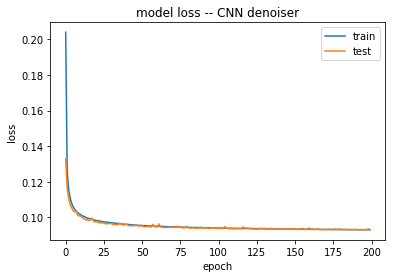

In [28]:
# Plot history for accuracy
plt.plot(history_den_cnn.history['loss'])
plt.plot(history_den_cnn.history['val_loss'])
plt.title('model loss -- CNN denoiser')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [17]:
#denoiser_cnn.save_weights("mldata/cnn_denoiser.h5")
denoiser_cnn.load_weights("mldata/cnn_denoiser.h5")

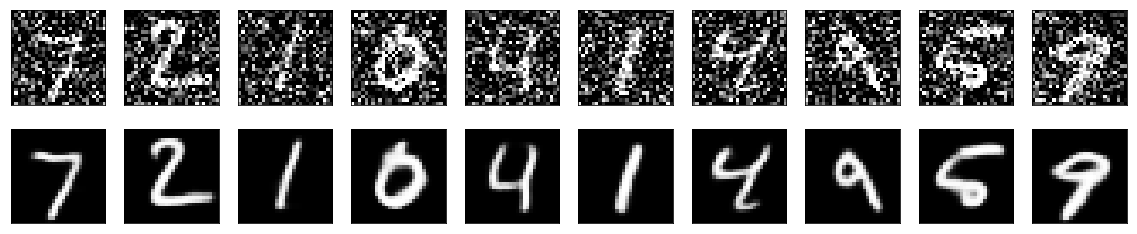

In [18]:
decoded_imgs = denoiser_cnn.predict(x_test_noisy)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()